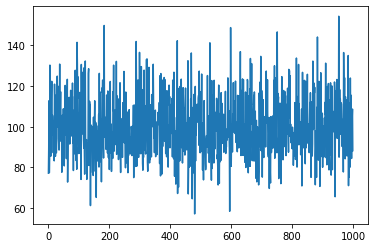

In [4]:
import numpy as np
k=0
k_l = []
while k < 1000:
    N = 100
    rand_vector = np.random.randn(N)

    leng= 0
    for n in rand_vector:
        leng+=n*n

    k_l.append(leng)
    k+=1

import matplotlib.pyplot as plt

plt.plot(k_l)
plt.show()
print(np.mean(k_l))